In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [73]:
experiments = [[] for i in range(8)]
percorso = "../models/exports/batch_n_controllori/"
for j in [5,6,7,8,9,10,11,12]:
    for i in range(10):
        try:
            experiments[j-5].append(pd.read_csv(percorso+"batch_"+str(j)+"_controllori/ticket_trend_"+str(i)+"_"+str(j)+".csv",header = False, names = ['Time','1','2','3','4','Abbonati','Utility','Total_risk']))
        except:
            pass

In [74]:
time_utility = [[[] for a in experiments[0][0]['Time']] for b in experiments]
for esp in range(len(experiments)):
    for t in range(len(experiments[esp][0])):
        for expo in range(len(experiments[esp])):
            time_utility[esp][t].append(experiments[esp][expo]['Utility'][t])
print shape(time_utility)

(8, 70, 10)


In [87]:
medie = [[[]for a in range(len(experiments[0][0]))]for i in experiments]
stds = [[[]for a in range(len(experiments[0][0]))]for i in experiments]
print shape(medie)
for esp in range(len(experiments)):
    for t in range(shape(medie)[1]):
        medie[esp][t] = [mean(time_utility[esp][t])]
        stds[esp][t] = [std(time_utility[esp][t])]

(8, 70, 0)


In [114]:
medieshort = [[]for i in experiments]
errshort = [[]for i in experiments]
medielong = [[]for i in experiments]
errlong = [[]for i in experiments]
for expo in range(len(experiments)):
    for i in range(len(experiments)):
        medieshort[expo]=(ravel(medie[expo])[26] - ravel(medie[expo])[0])
        errshort[expo] = sqrt((ravel(stds[expo])[26])**2 + (ravel(stds[expo])[0])**2)
        medielong[expo]=(ravel(medie[expo])[len(ravel(medie[expo]))-1] - ravel(medie[expo])[len(ravel(medie[expo]))-52])
        errlong[expo] = sqrt((ravel(stds[expo])[len(ravel(stds[expo]))-1])**2 + (ravel(stds[expo])[len(ravel(stds[expo]))-52])**2)


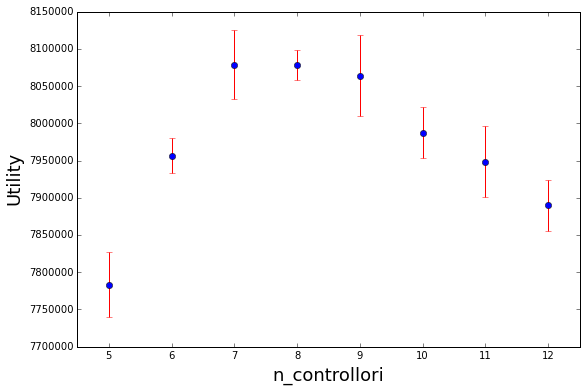

In [120]:
fig3 = plt.figure(1, figsize=(9, 6))
ax = fig3.add_subplot(111)
plt.xlim(xmin= 4.5,xmax=12.5)
#plt.ylim(ymin=7745000,ymax=8150000)
plt.errorbar([5,6,7,8,9,10,11,12], medielong, errlong, linestyle='None', marker='o',ecolor='red')
plt.xlabel('n_controllori',fontsize=18)
plt.ylabel('Utility',fontsize=18)


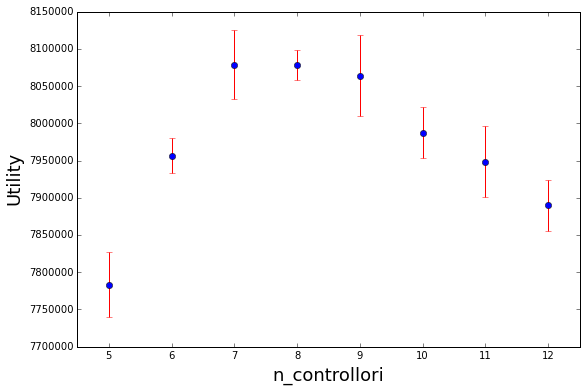

In [121]:
fig3 = plt.figure(1, figsize=(9, 6))
ax = fig3.add_subplot(111)
plt.xlim(xmin= 4.5,xmax=12.5)
#plt.ylim(ymin=7745000,ymax=8150000)
plt.errorbar([5,6,7,8,9,10,11,12], medielong, errlong, linestyle='None', marker='o',ecolor='red')
plt.xlabel('n_controllori',fontsize=18)
plt.ylabel('Utility',fontsize=18)

In [122]:
print medielong
print errlong

[7783155.8999999911, 7956347.450000003, 8078698.049999997, 8078454.549999997, 8064105.549999997, 7987537.549999997, 7948689.049999997, 7889758.049999997]
[43918.317990617536, 23631.535809432698, 46436.899722230599, 20661.946839843044, 54871.05456032807, 34109.522692534119, 47392.504953447016, 34700.968951349183]


In [123]:
print medieshort
print errshort

[3849949.299999997, 3991575.150000006, 4091857.549999997, 4163172.0, 4234427.1499999911, 4265799.1000000089, 4309793.549999997, 4319456.400000006]
[29637.266542732985, 27659.673147065565, 35329.988810817646, 15959.56272756243, 25614.043367116017, 20898.972547113412, 29252.608753964148, 12185.522666057455]
